# <center>~ Pittsburgh Flight Data Explanatory Analysis ~</center>
## <center>An Explanatory Analysis of Delayed Flights in Pittsburgh, PA in 2007</center>
<p><em>Created by Miles Murphy</em></p>
<em>November 11, 2020</em>

## Introduction: <a name="introduction"></a>

The following analysis will build upon the Exploratory analysis conducted on US Flight Data. The previous analysis focused on understand the basic nature of the flight data and then focusing in on flight data in Pittsburgh, PA in the years 1988 and 2007. This years are arbitrarily chosen from a data perspective, but are very important to the analyst's life as they are the year of his birth in Pittsburgh and the year he left Pittsburgh as an 18 year old "adult". 

Now, after being created and cleaned in the exploratory analysis, this delays dataframe contains only flights in Pittsburgh in 2007 which experienced delays from one (or more) of the 5 delay types; Carrier, Weather, NAS (National Air System), Security, and Late Aircraft delays. The following explanatory analysis will look at some basic features of this dataframe with univariate analysis and then expand upon those features with bivariate or multivariate figures before providing some conclusions based on the analysis. 

# Table of Contents:
1. [Introduction](#introduction)
2. [Project Background](#project_background)
    1. [Data Source Information](#data_source_information)
    2. [Exploaratory Analysis Summary](#exploratory_analysis)
    3. [Dataframe Basic Information](#dataframe_information) 
3. [Explanatory Analysis](#explanatory_analysis)
    1. [Questions](#questions)
    3. [Univariate Analysis](#univariate_analysis)
        1. [Most Popular Month to Fly](#popular_month)
        2. [Most Popular Day of the Week to Fly](#popular_day)
        3. [Most Popular Flight Destinations and Origins](#popular_destinations_origins
        4. [Flight Length and Delay Length](#flight_delay_length)
    3. [Bivariate Analysis](#bivariate_analysis)
        1. [Total Delay Time By Delay Type Combination](#delay_time_type)
        2. [Total Delay Time by Days of the Week](#delay_time_day)
        3. [Total Delay Time by Month](#delay_time_month)
    4. [Multivariate Analysis](#multivariate_analysis)
        1. [#### a. Average Total Delay Time for the Day of the Week](#avg_delay_day)
        2. [Average Total Delay Time for Month](#avg_delay_month)
        3. [Total Elapsed Time and Delay Type for Flights Departing Pittsburgh](#elapsed_delay_depart)
4. [Explanatory Analysis Summary](#project_summary)
    1. [Next Steps](#next_steps)


## Project Background: <a name="project_background"></a>

This explanatory data analysis is part of the larger Udacity Data Analyst Nanodegree. The final project for the Data Visualization process involves the exploratory and explanatory analysis of a dataset. US Flight data was one of the provided options.

### Data Source Information: <a name="data_source_information"></a>

The US flight data utilized in both the exploratory analysis and this explanatory analysis of delayed flights in Pittsburgh all come from the original datasets colelcted by the United States Department of Transportation, Bureau of Transportation Statistics. The Bureau has been collecting data about the 'on-time' performance of all flights from 1987 to the present. The exploratory analysis originally explored flight data from both 1988 and 2007, but for the explanatory analysis that original dataset has been reduced to just flights from 2007 which departed from or originated in Pittsburgh, PA and experienced delays. 

[Exploaratory Analysis Summary](#exploratory_analysis

In [1]:
#Import packages and set plots to be embedded
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#Credit to https://stackoverflow.com/questions/40105796/turn-warning-off-in-a-cell-jupyter-notebook
#This line of code was utitlized as a known bug for matplotlib was printing with a figure on slides and ruining the presentation
#import warnings
#warnings.filterwarnings('ignore')
#warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
#Create df
pit_delays = pd.read_csv("pittsburgh_07_delays.csv")

### Dataframe Basic Information <a name="dataframe_information"></a>

In [3]:
pit_delays.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DelayType
0,2007,1,2,2,15:04:00,14:35:00,22:19:00,21:40:00,WN,2659,...,8,0,NaN,0,0,29,10,0,0,"Weather, NAS"
1,2007,1,2,2,14:00:00,13:35:00,16:08:00,15:50:00,WN,304,...,7,0,NaN,0,10,0,0,0,8,"Carrier, Late Aircraft"
2,2007,1,2,2,17:30:00,16:55:00,19:39:00,19:15:00,WN,723,...,11,0,NaN,0,4,0,0,0,20,"Carrier, Late Aircraft"
3,2007,1,2,2,18:36:00,18:10:00,19:55:00,19:25:00,WN,1597,...,25,0,NaN,0,2,0,4,0,24,"Carrier, NAS, Late Aircraft"
4,2007,1,2,2,15:55:00,14:50:00,21:45:00,20:55:00,WN,647,...,9,0,NaN,0,43,0,0,0,7,"Carrier, Late Aircraft"


In [4]:
pit_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25515 entries, 0 to 25514
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               25515 non-null  int64  
 1   Month              25515 non-null  int64  
 2   DayofMonth         25515 non-null  int64  
 3   DayOfWeek          25515 non-null  int64  
 4   DepTime            25506 non-null  object 
 5   CRSDepTime         25515 non-null  object 
 6   ArrTime            25495 non-null  object 
 7   CRSArrTime         25515 non-null  object 
 8   UniqueCarrier      25515 non-null  object 
 9   FlightNum          25515 non-null  int64  
 10  TailNum            25515 non-null  object 
 11  ActualElapsedTime  25515 non-null  float64
 12  CRSElapsedTime     25515 non-null  float64
 13  AirTime            25515 non-null  float64
 14  ArrDelay           25515 non-null  float64
 15  DepDelay           25515 non-null  float64
 16  Origin             255

In [5]:
pit_delays.describe()

,Year,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,25515.0,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,...,25515.000000,25515.000000,25515.0,0.0,25515.0,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000
mean,2007.0,6.233431,15.800235,3.886106,2599.530159,125.724397,116.547208,92.386518,52.203371,43.026181,...,7.946502,25.391378,0.0,NaN,0.0,13.091593,2.703194,15.728317,0.076426,20.603841
std,0.0,3.476602,8.597204,1.960544,1888.638510,57.601936,53.804844,56.475078,42.085848,44.574080,...,6.634130,20.100771,0.0,NaN,0.0,26.048881,14.316517,25.863651,1.574033,34.951583
min,2007.0,1.000000,1.000000,1.000000,1.000000,32.000000,50.000000,0.000000,15.000000,-29.000000,...,0.000000,1.000000,0.0,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.0,3.000000,8.000000,2.000000,1058.000000,86.000000,83.000000,57.000000,23.000000,11.000000,...,5.000000,13.000000,0.0,NaN,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.0,6.000000,16.000000,4.000000,1830.000000,108.000000,99.000000,70.000000,36.000000,31.000000,...,6.000000,19.000000,0.0,NaN,0.0,0.000000,0.000000,6.000000,0.000000,0.000000
75%,2007.0,9.000000,23.000000,5.000000,3750.000000,152.000000,135.000000,116.000000,66.000000,61.000000,...,9.000000,31.000000,0.0,NaN,0.0,16.000000,0.000000,21.000000,0.000000,28.000000
max,2007.0,12.000000,31.000000,7.000000,7497.000000,460.000000,343.000000,368.000000,355.000000,367.000000,...,160.000000,227.000000,0.0,NaN,0.0,200.000000,200.000000,200.000000,130.000000,200.000000


This dataframe consists of 30 columns featuring 25,515 rows of flight data for flights to and from Pittsburgh, PA in 2007 which experienced delays. It should be noted that the CancellationCode column has zero non-null values, as none of these flights were cancelled. Normally that column would be dropped in a cleaning process, but instead it will just be ignored as it will not impact this explanatory visual analysis.

## Explanatory Analysis <a name="explanatory_analysis"></a>

### Questions <a name="questions"></a>

The following are some of the questions which will be answered by this explanatory analysis to provide key insights into the dataframe
<ul>
    <li>What are the most popular month and day of the week to fly?</li>
    <li>How long are flights?</li>
    <li>How long are delay times</li>
    <li>What delay types cause the most delays?</li>
    <li>Does any month or day of the weeke experience more or less delay time?</li>
    <li>How do delay types vary between the destinations of Pittsburgh flights in 2007?</li>
</ul>

### Univariate Analysis <a name="univariate_analysis"></a>

The first few figures will create some basic visualizations to show simple information about the dataset prior to the more detailed/insightful bivariate and multivariate analysis.

#### a. Most Popular Month to Fly <a name="popular_month"></a>

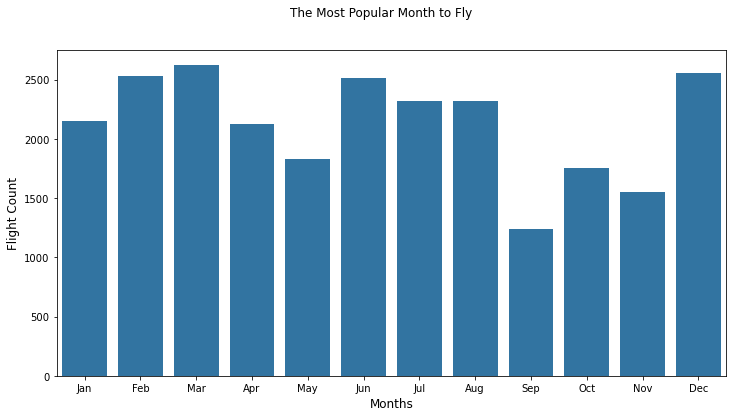

In [6]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('The Most Popular Month to Fly')

pit_month = pit_delays['Month'].value_counts().sort_index()

#Monthly flight data
sns.barplot(x=pit_month.index, y=pit_month, color=base_color)
ax.set_xticklabels(labels=months)
ax.set_ylabel('Flight Count', fontsize=12)
ax.set_xlabel('Months', fontsize=12);

This figure shows the total flight count by month for flights with delays in Pittsburgh, PA in 2007. Several months had 2,000-2,500 flights and September was the lowest with only around 1,250.

#### b. Most Popular Day of the Week <a name="popular_day"></a>

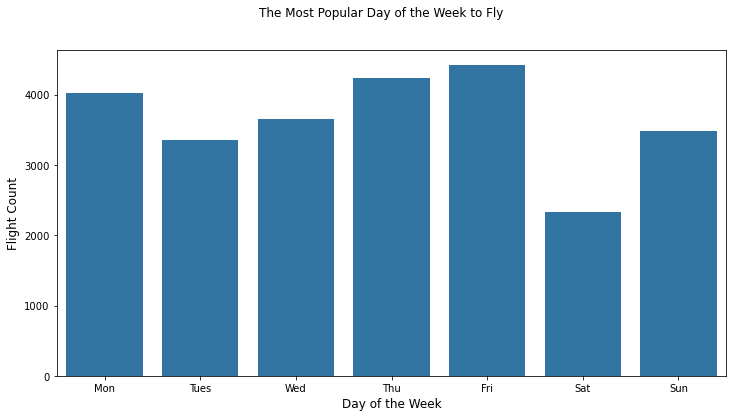

In [7]:
days_of_week = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('The Most Popular Day of the Week to Fly')

pit_day = pit_delays['DayOfWeek'].value_counts().sort_index()

#Plot the 2007 day of week flight data
sns.barplot(x=pit_day.index, y=pit_day, color=base_color)
ax.set_xticklabels(labels=days_of_week)
ax.set_ylabel('Flight Count', fontsize=12)
ax.set_xlabel('Day of the Week', fontsize=12);

This figure showed the flight count by day of the week for flights to and from Pittsburgh PA in 2007 which experienced delays. Thursday and Friday were the most traveled days with over 4,000 flights and Saturday was the least traveled with only around 2,500 flights

#### c. Most Popular Flight Destinations and Origins <a name="popular_destinations_origins"></a>

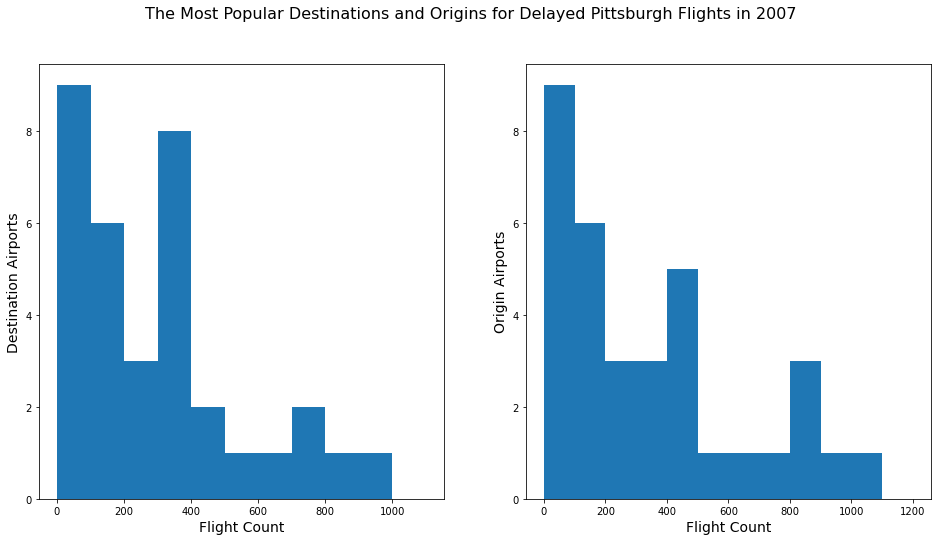

In [8]:
pit_origins = pit_delays.query("Origin != 'PIT'").Origin.value_counts()
origin_bins = np.arange(0, pit_origins.max(), 100)

pit_destinations = pit_delays.query("Dest != 'PIT'").Dest.value_counts()
dest_bins = np.arange(0, pit_destinations.max(), 100)

fig = plt.figure(figsize=(16, 8))
fig.suptitle('The Most Popular Destinations and Origins for Delayed Pittsburgh Flights in 2007', fontsize=16)
fig.tight_layout

plt.subplot(1, 2, 1)
plt.hist(pit_destinations, bins = dest_bins)
plt.xlabel('Flight Count', fontsize=14)
plt.ylabel('Destination Airports', fontsize=14)

plt.subplot(1, 2, 2)
plt.hist(pit_origins, bins = origin_bins)
plt.xlabel('Flight Count', fontsize=14)
plt.ylabel('Origin Airports', fontsize=14);

In [9]:
print(pit_origins.count(), pit_destinations.count())

35 36


These two subplots show flight count for the 36 destination airports and 35 origin airports. The majority of airports dealt with 500 flights or less, with most handling 200 flights or less. Only 5 origins and only 2 destinations experienced more than 800 delayed flights in 2007 

#### d. Flight Length and Delay Length <a name="flight_delay_length"></a>

In [10]:
#Create total delay time for each type of delay
carrier_total = pit_delays.CarrierDelay.sum()
nas_total = pit_delays.NASDelay.sum()
weather_total = pit_delays.WeatherDelay.sum()
security_total = pit_delays.SecurityDelay.sum()
late_total = pit_delays.LateAircraftDelay.sum()

#Create a total delay time column
pit_delays['TotalDelay'] = (pit_delays.CarrierDelay + pit_delays.WeatherDelay + pit_delays.NASDelay + pit_delays.SecurityDelay + pit_delays.LateAircraftDelay)

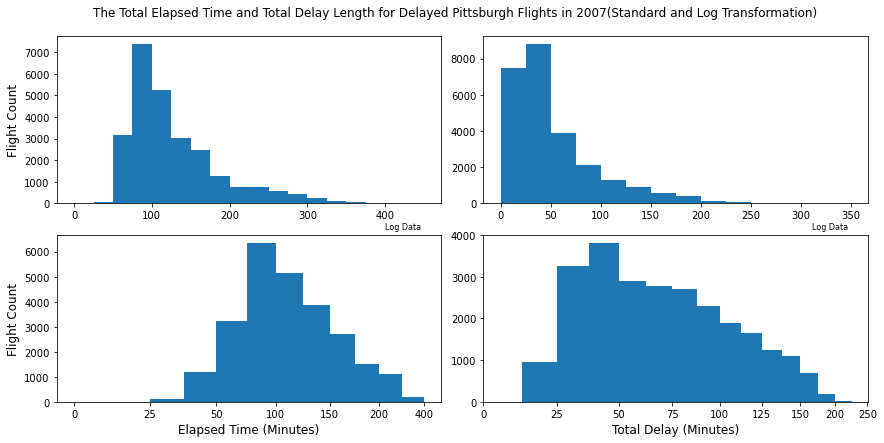

In [11]:
elapsed_time_bins = np.arange(0, pit_delays.ActualElapsedTime.max(), 25)
delay_time_bins = np.arange(0, pit_delays.TotalDelay.max(), 25)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('The Total Elapsed Time and Total Delay Length for Delayed Pittsburgh Flights in 2007(Standard and Log Transformation)')
fig.tight_layout()
#1st Subplot
ax1.hist(pit_delays.ActualElapsedTime, bins = elapsed_time_bins)
ax1.set_ylabel('Flight Count', fontsize=12)
#2nd Subplot (Using labels from 1st and 4th subplots)
ax2.hist(pit_delays.TotalDelay, bins = delay_time_bins)
#Create log data
log_elapsed = np.log10(pit_delays.ActualElapsedTime)
log_elapsed_bins = np.arange(1.4, log_elapsed.max(), .1)
elapsed_log_ticks = [1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
elapsed_log_labels = ['0', '25', '50', '100', '150', '200', '400']
log_delay = np.log10(pit_delays.TotalDelay)
log_delay_bins = np.arange(1.1, log_delay.max(), .1)
delay_log_ticks = [1, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]
delay_log_labels = ['0', '25', '50', '75', '100', '125', '150', '200', '250']
#3rd Subplot
ax3.hist(log_elapsed, bins = log_elapsed_bins)
ax3.set_xscale('log')
ax3.set_xticks(elapsed_log_ticks)
ax3.set_xticklabels(elapsed_log_labels)
ax3.set_xlabel('Elapsed Time (Minutes)', fontsize=12)
ax3.set_ylabel('Flight Count', fontsize=12)
ax3.set_title('Log Data', fontsize=8, x=0.9)
#4th Subplot (Using y label from subplot 3)
ax4.hist(log_delay, bins = log_delay_bins)
ax4.set_xscale('log')
ax4.set_xticks(delay_log_ticks)
ax4.set_xticklabels(delay_log_labels)
ax4.set_xlabel('Total Delay (Minutes)', fontsize=12)
ax4.set_title('Log Data', fontsize=8, x=0.9);

The standard and log transformations of the Actual Elapsed Time and Total Delay Time of delayed flights in Pittsburgh in 2007 show that most flights had an elapsed time of 100 to 200 minutes and total delay time of 25 to 75 minutes.

### Bivariate Analysis <a name="bivariate_analysis"></a>

#### a. Total Delay Time By Delay Type Combination <a name="delay_time_type"></a>

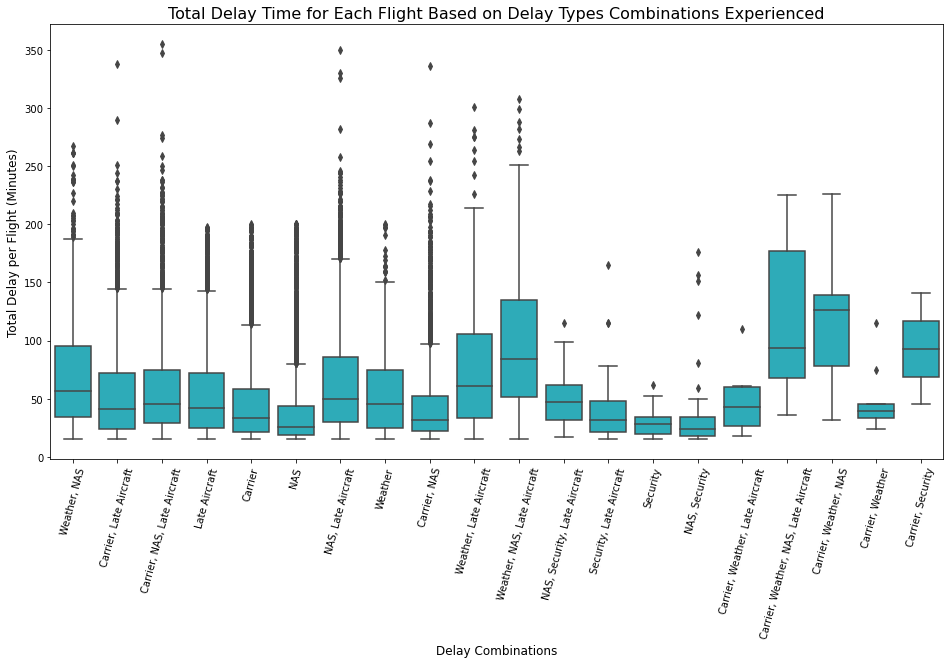

In [12]:
base_color = sns.color_palette()[9]

fig= plt.figure(figsize=(16,8))

sns.boxplot(data=pit_delays, x='DelayType', y='TotalDelay', color=base_color)
plt.xticks(rotation=75)
#plt.ylim(0, 360)
plt.title('Total Delay Time for Each Flight Based on Delay Types Combinations Experienced', fontsize=16)
plt.ylabel('Total Delay per Flight (Minutes)', fontsize=12)
plt.xlabel('Delay Combinations', fontsize=12);

Most Delay Type combinations caused a flight to experience between approximately 25 minutes to 75 minutes of delays. Some delay types, such as the combinations with a Late Aircraft Delay, experienced higher total delay times with some exceeding 250 minutes

#### b. Total Delay Time by Days of the Week <a name="delay_time_day"></a>

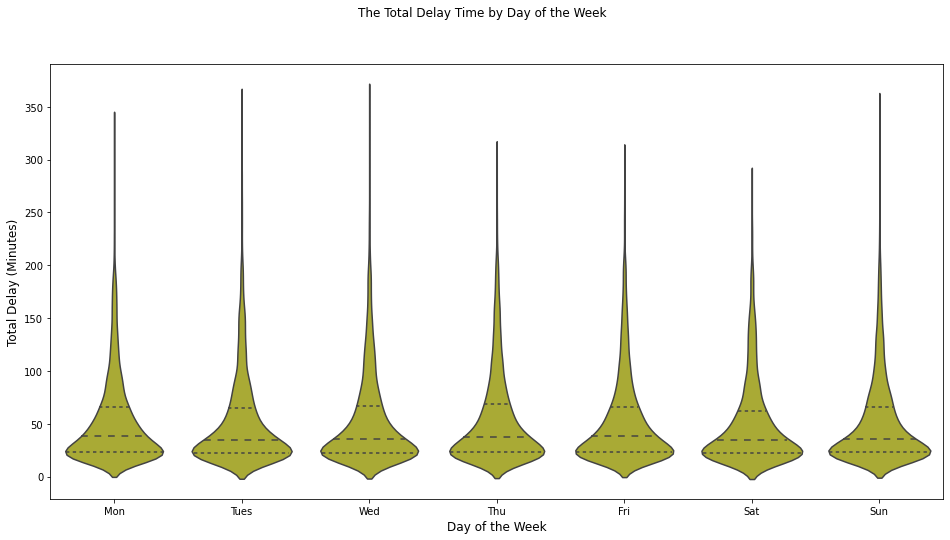

In [13]:
base_color=sns.color_palette()[8]

fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('The Total Delay Time by Day of the Week')
plt.tight_layout

sns.violinplot(data=pit_delays, x = 'DayOfWeek', y='TotalDelay', ax=ax, color=base_color, inner='quartile')
ax.set_xticklabels(labels=days_of_week)
ax.set_xlabel('Day of the Week', fontsize='large')
ax.set_ylabel('Total Delay (Minutes)', fontsize='large');

This figure shows that the Total Delay Time is fairly consistent by day of the week, with Saturday seeing lower totals than the other days.

#### c. Total Delay Time by Month <a name="delay_time_month"></a>

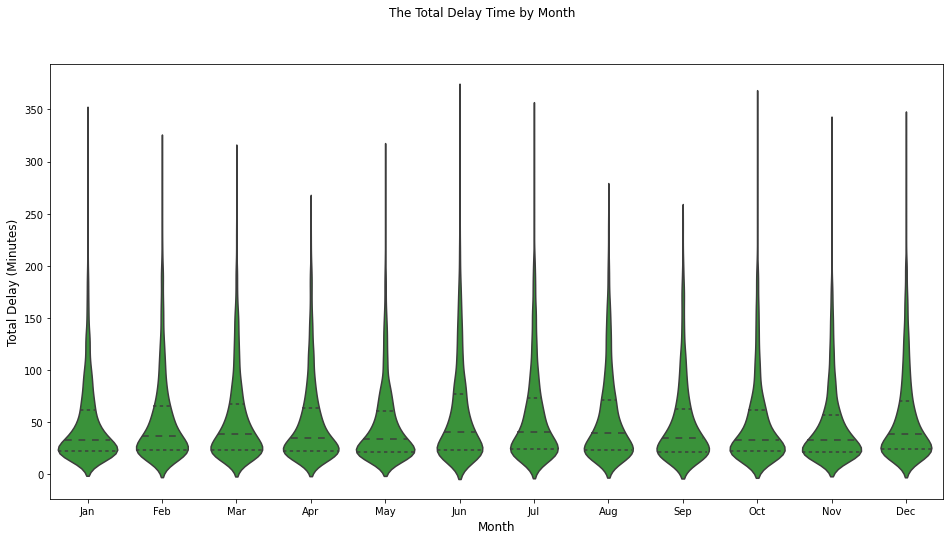

In [14]:
base_color=sns.color_palette()[2]

fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('The Total Delay Time by Month')
plt.tight_layout

sns.violinplot(data=pit_delays, x = 'Month', y='TotalDelay', ax=ax, color=base_color, inner='quartile')
ax.set_xticklabels(labels=months)
ax.set_xlabel('Month', fontsize='large')
ax.set_ylabel('Total Delay (Minutes)', fontsize='large');

This figure shows little variation in the average delay times experienced, but April, August, and September have lowest delay times.

### Multivariate Analysis <a name="multivariate_analysis"></a>

Due to the high number of delay combinations, only the top 5 delay type combinations will be utilized for the following figures

#### a. Average Total Delay Time for the Day of the Week <a name="avg_delay_day"></a>

In [15]:
#First, identify the top 5 delaytype combinations
pit_delays.DelayType.value_counts().head()

NAS                   5566
Carrier               3525
Carrier, NAS          3328
NAS, Late Aircraft    3319
Late Aircraft         2956
Name: DelayType, dtype: int64

In [16]:
#Second, create a sub dataframe including just these 5 types
top_delays = pit_delays.query("DelayType == 'NAS' or DelayType == 'Carrier' or DelayType == 'Carrier, NAS' or DelayType =='NAS, Late Aircraft' or DelayType == 'Late Aircraft'")
top_delays.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DelayType,TotalDelay
7,2007,1,2,2,22:02:00,21:20:00,23:01:00,22:35:00,WN,647,...,0,NaN,0,0,0,0,0,26,Late Aircraft,26
8,2007,1,3,3,15:03:00,14:35:00,21:57:00,21:40:00,WN,2659,...,0,NaN,0,17,0,0,0,0,Carrier,17
10,2007,1,3,3,18:15:00,18:10:00,19:43:00,19:25:00,WN,1597,...,0,NaN,0,0,0,18,0,0,NAS,18
12,2007,1,3,3,07:17:00,07:15:00,08:18:00,07:50:00,WN,571,...,0,NaN,0,0,0,28,0,0,NAS,28
14,2007,1,4,4,17:04:00,17:05:00,19:20:00,19:00:00,WN,641,...,0,NaN,0,0,0,20,0,0,NAS,20


In [17]:
#Confirm that it work with a value_counts()
top_delays.DelayType.value_counts()

NAS                   5566
Carrier               3525
Carrier, NAS          3328
NAS, Late Aircraft    3319
Late Aircraft         2956
Name: DelayType, dtype: int64

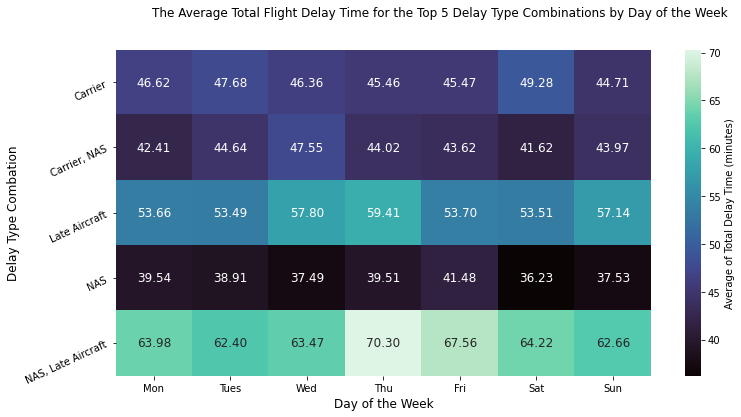

In [18]:
#Now, use this new df to create a multivariate figure
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('The Average Total Flight Delay Time for the Top 5 Delay Type Combinations by Day of the Week')

cat_means = top_delays.groupby(['DayOfWeek', 'DelayType']).mean()['TotalDelay']
cat_means = cat_means.reset_index(name = 'TotalDelayAvg')
cat_means = cat_means.pivot(index = 'DelayType', columns = 'DayOfWeek', values = 'TotalDelayAvg')

y_labels = ['Carrier', 'Carrier, NAS', 'Late Aircraft', 'NAS', 'NAS, Late Aircraft' ]

sns.heatmap(cat_means, annot = True, fmt = '.2f', annot_kws={'size':12}, cbar_kws = {'label': 'Average of Total Delay Time (minutes)'}, cmap='mako')
ax.set_yticklabels(y_labels, rotation=25)
ax.set_xticklabels(days_of_week)
ax.set_xlabel('Day of the Week', fontsize='large')
ax.set_ylabel('Delay Type Combation', fontsize='large');

The above figure shows that the Delay Type Combination of 'NAS, Late Aircraft' lead to most delays by day of the week and 'NAS' alone lead to the least. Thursday was the most delayed day of the week by the top 5 delay types

#### b. Average Total Delay Time for Month <a name="avg_delay_month"></a>

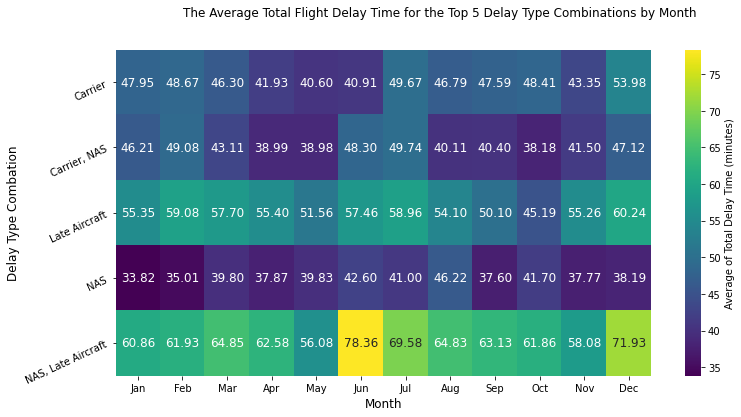

In [19]:
#Use the same basic format but a different color palette for Months
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('The Average Total Flight Delay Time for the Top 5 Delay Type Combinations by Month')

cat_means = top_delays.groupby(['Month', 'DelayType']).mean()['TotalDelay']
cat_means = cat_means.reset_index(name = 'TotalDelayAvg')
cat_means = cat_means.pivot(index = 'DelayType', columns = 'Month', values = 'TotalDelayAvg')

y_labels = ['Carrier', 'Carrier, NAS', 'Late Aircraft', 'NAS', 'NAS, Late Aircraft' ]

sns.heatmap(cat_means, annot = True, fmt = '.2f', annot_kws={'size':12}, cbar_kws = {'label': 'Average of Total Delay Time (minutes)'}, cmap='viridis')
ax.set_yticklabels(y_labels, rotation=25)
ax.set_xticklabels(months)
ax.set_xlabel('Month', fontsize='large')
ax.set_ylabel('Delay Type Combation', fontsize='large');

The figure looking at delay type combinations by month also has the 'NAS, Late Aircraft' delay combination leading to the highest average delay time in every month, with June experiencing almost an average of 80 minutes per 'NAS, Late Aircraft' delay

#### c. Total Elapsed Time and Delay Type for Flights Departing Pittsburgh <a name="elapsed_delay_depart"></a>

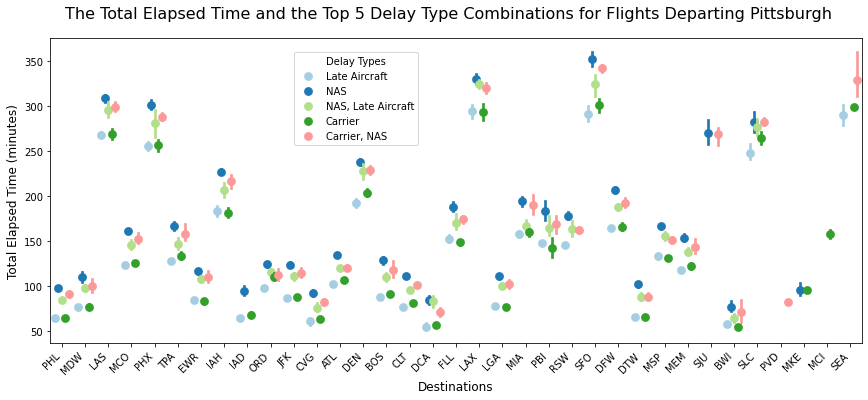

In [20]:
#Eliminate the flights which are destined for PIT
destinations = top_delays.query("Dest !='PIT'")

point_palette = sns.color_palette('Paired')
fig, ax = plt.subplots(figsize=(12, 6)) 
fig.suptitle('The Total Elapsed Time and the Top 5 Delay Type Combinations for Flights Departing Pittsburgh', fontsize = 16)
fig.tight_layout()
fig.autofmt_xdate(rotation=45)

sns.pointplot(data=destinations, x = 'Dest', y = 'ActualElapsedTime', hue = 'DelayType', dodge = .6, linestyles = "", palette=point_palette)
ax.legend(title='Delay Types', loc=(.3, .65))
ax.set_xlabel('Destinations', fontsize=12)
ax.set_ylabel('Total Elapsed Time (minutes)', fontsize=12);

The above figure provides a lot of interesting insights, but the most may be that despite having the lowest Total Delay Times, NAS delays seem to add the most to Total Elapsed Time of flights.

## Explanatory Analysis Summary <a name="project_summary"></a>

The following are a summary of the key insights from this explanatory analysis (in no order of importance):
<ul>
    <li>Several months had 2,000-2,500 flights and September was the lowest with only around 1,250</li>
    <li>NAS delays seem to add the most to Total Elapsed Time of flights</li>
    <li>April, August, and September have lowest total delay times</li>
    <li>Most Delay Types cause approximately 25 minutes to 75 minutes of total delay time</li>
    <li>Most traveled day(s) of the week were Thursday and Friday with over 4,000 flights</li>
    <li>Least traveled day of the week was Saturday only around 2,500 flights</li>
    <li>Delay Type Combination of 'NAS, Late Aircraft' lead to the highest avg delay time by day of the week</li>
    <li>Delay Type Combination of 'NAS, Late Aircraft' caused the highest average delay time every month</li>

### Next Steps <a name="next_steps"></a>

There are many aspects of this dataframe, let alone the larger dataframes which need to be explored in greater detail.
<ol>
    <li>Gain a better understanding of how each type of delay impacts the delaytime of a flight and the elapsed time of a flight</li>
    <li>Examine the flights to and from massive hub airports (e.g. Atlanta, NYC, and Chicago) separately from those the smaller regional and local airports</li>
    <li>Explore whether travel on Saturday is less preferred outside of this Pittsburgh delays df from 2007 - is it seen in every year?</li>
    <li>And many, many more</li>
</ol>

<em>Throughout this explanatory analysis and the exploratory analysis, credit was given to any significant reference utilized for the creation of this project. Additionally, Udacity resources related to Data Analyst Nanodegree were referenced, along with minimal review of similar problems in the Mentor Resources. No aspects of this project were knowingly plagarized.</em>